# Sharpe Ratio
The Sharpe ratio is a metric that helps quantify both the risk and the potential reward of a particular investment.
```
Sharpe Ration = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviation
```

For our purposes, 
* the risk free option is simply holding the stable coin, which returns 0%
* the arbitrage strategy will be compared to staking stable coin


## Assumptions
* staking is risk free return alternative
* average staking reward is 2% / year
* 365 trading days / year, crypto trading is 24/7


In [14]:
import pandas as pd
import numpy as np
%matplotlib inline

## Input needed
* A representative daily return of arbitrage trading
* risk free annualized return

## Derived metrics
* Annualized Ave. return of arbitrage trading
* Annualized Standard Deviation of arbitrage trading

In [15]:
# Define trading days per year for analysis and calculations
trading_days_per_year = 365

# risk free return from assumption
staking_annualized_return = 0.02 # 2%

## Create a mock of daily return arbitrage trading

### Criteria
* mean of 0.00
* occasional deviations from mean +/- 6%
* one years worth of data

In [16]:
# create a mock return for a year's worth of data
mock_arbitrage_daily_returns = pd.Series(np.random.normal(
    loc=0,
    scale=0.018,
    size=365
))
# inspect mock arbitrage series
mock_arbitrage_daily_returns

0      0.005237
1      0.016392
2     -0.026107
3      0.005356
4     -0.009383
         ...   
360    0.014190
361    0.019721
362    0.008767
363   -0.005400
364    0.009144
Length: 365, dtype: float64

In [17]:
# look at the summary stats for the mock arbitrage series
mock_arbitrage_daily_returns.describe()

count    365.000000
mean       0.001593
std        0.019087
min       -0.069800
25%       -0.011588
50%        0.000519
75%        0.013959
max        0.060014
dtype: float64

mock_daily_returns series meets the initial criteria.

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage'}>

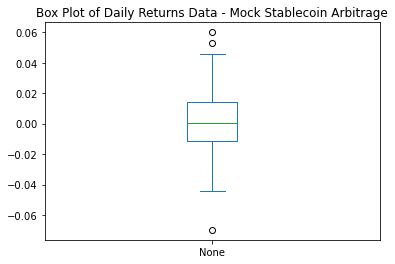

In [18]:
# Visualize Daily return summary statistics for the mock arbitrage series
mock_arbitrage_daily_returns.plot.box(title="Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage")

## create a mock series for the staking option

### Criteria
* 2 % annualized return
* one years worth of data

In [19]:
# calculate the staking daily return
staking_daily_return = staking_annualized_return / trading_days_per_year

# display the staking_daily_return
print(f"staking_daily_return={staking_daily_return*100:.4f}%")

# create a mock series for the staking option
mock_staking_daily_returns = pd.Series(np.random.normal(
    loc=staking_daily_return,
    scale=staking_daily_return/3,
    size=365
))

# inspect mock series for the staking option 
mock_staking_daily_returns

staking_daily_return=0.0055%


0      0.000068
1      0.000049
2      0.000067
3      0.000068
4      0.000052
         ...   
360    0.000054
361    0.000062
362    0.000050
363    0.000070
364    0.000064
Length: 365, dtype: float64

In [20]:
# look at the summary stats for the mock staking series
mock_staking_daily_returns.describe()

count    3.650000e+02
mean     5.378723e-05
std      1.733512e-05
min      7.231437e-07
25%      4.287415e-05
50%      5.170368e-05
75%      6.613118e-05
max      1.071485e-04
dtype: float64

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage'}>

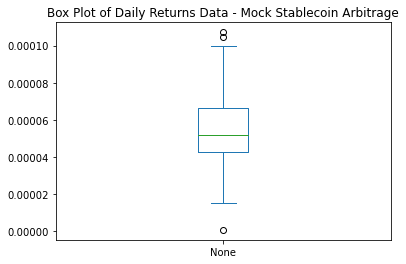

In [21]:
# Visualize daily return summary statistics for the mock staking series
mock_staking_daily_returns.plot.box(title="Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage")

## Combine into a dataframe

In [22]:
returns_df = pd.DataFrame(
    {'arbitrage':mock_arbitrage_daily_returns,
     'staking':mock_staking_daily_returns
    }
)
returns_df

,arbitrage,staking
0,0.005237,0.000068
1,0.016392,0.000049
2,-0.026107,0.000067
3,0.005356,0.000068
4,-0.009383,0.000052
...,...,...
360,0.014190,0.000054
361,0.019721,0.000062
362,0.008767,0.000050
363,-0.005400,0.000070


## Calculate Annualized Ave. Return


In [23]:
# calculate the average annualized return
annualized_returns = returns_df.mean() * trading_days_per_year

# display the average annualized return
annualized_returns

arbitrage    0.581524
staking      0.019632
dtype: float64

## Calculate Annualized Standard Deviation


In [24]:
# calculate the annualized standard deviation
annual_standard_deviation = returns_df.std() * np.sqrt(trading_days_per_year)

# display the annualized standard deviation
annual_standard_deviation

arbitrage    0.364649
staking      0.000331
dtype: float64

## Calculate Sharpe Ratio


In [25]:
# calculate sharpe ratio
# Sharpe Ration = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviatio
sharpe_ratio = (annualized_returns)/annual_standard_deviation

# display sharpe ratio
sharpe_ratio

arbitrage     1.594748
staking      59.278720
dtype: float64

<AxesSubplot:title={'center':'Risk/Reward (Sharpe Ratio) Comparison of arbitrage vs staking'}>

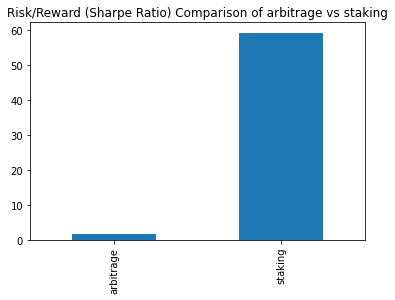

In [26]:
sharpe_ratio.plot(
    kind="bar",
    title="Risk/Reward (Sharpe Ratio) Comparison of arbitrage vs staking"
)